In [1]:
#OXO con inteligencia debil
import random

# Inicializar el tablero
board = [""] * 9
player_turn = True
game_over = False

# Función para imprimir el tablero
def print_board(board):
    for i in range(0, 9, 3):
        print(board[i], "|", board[i+1], "|", board[i+2])
        if i < 6:
            print("---------")

# Función para verificar si un jugador ha ganado
def check_winner(board, player):
    for line in [[0, 1, 2], [3, 4, 5], [6, 7, 8], [0, 3, 6], [1, 4, 7], [2, 5, 8], [0, 4, 8], [2, 4, 6]]:
        if all(board[i] == player for i in line):
            return True
    return False

# Función para que la IA haga un movimiento aleatorio
def ai_move(board):
    empty_cells = [i for i in range(9) if board[i] == ""]
    if empty_cells:
        return random.choice(empty_cells)
    return None

# Ciclo principal del juego
while not game_over:
    print_board(board)
    
    if player_turn:
        print("Tu turno (X)")
        move = input("Elige una casilla (0-8): ")
        if move.isdigit() and 0 <= int(move) < 9 and board[int(move)] == "":
            board[int(move)] = "X"
            player_turn = False
        else:
            print("Movimiento inválido, por favor elige una casilla vacía entre 0 y 8.")
    else:
        print("Turno de la IA (O)")
        ai_position = ai_move(board)
        if ai_position is not None:
            board[ai_position] = "O"
            player_turn = True
    
    if check_winner(board, "X"):
        print_board(board)
        print("¡Ganaste!")
        game_over = True
    elif check_winner(board, "O"):
        print_board(board)
        print("¡La IA ganó!")
        game_over = True
    elif "" not in board:
        print_board(board)
        print("Empate")
        game_over = True

print("Fin del juego")


 |  | 
---------
 |  | 
---------
 |  | 
Tu turno (X)
 |  | 
---------
 |  | X
---------
 |  | 
Turno de la IA (O)
 |  | 
---------
O |  | X
---------
 |  | 
Tu turno (X)
 |  | X
---------
O |  | X
---------
 |  | 
Turno de la IA (O)
 | O | X
---------
O |  | X
---------
 |  | 
Tu turno (X)
 | O | X
---------
O |  | X
---------
 |  | X
¡Ganaste!
Fin del juego


In [ ]:
#OXO con inteligencia fuerte
import random

# Inicializar el tablero
board = [""] * 9
# Parámetros de Q-learning
learning_rate = 0.1
discount_factor = 0.9
exploration_prob = 0.1  # Probabilidad de exploración

# Crear una tabla Q para el agente (en este caso, el jugador "X")
q_table = {}

# Función para codificar el estado del tablero a una cadena
def encode_state(board):
    return "".join(board)

# Función para que la IA haga un movimiento basado en Q-learning
def ai_move(board):
    state = encode_state(board)
    
    # Si el estado no está en la tabla Q, lo inicializamos
    if state not in q_table:
        q_table[state] = [0.0] * 9  # Inicializamos valores Q para el estado
    
    legal_moves = [i for i, cell in enumerate(board) if cell == ""]
    
    # Exploración vs. Explotación
    if random.uniform(0, 1) < exploration_prob:
        return random.choice(legal_moves)
    else:
        # Devolvemos la acción con el mayor valor Q
        return max(legal_moves, key=lambda move: q_table[state][move])

# Función para actualizar la tabla Q después de una jugada
def update_q_table(state, action, reward, next_state):
    if state not in q_table:
        q_table[state] = [0.0] * 9
    if next_state not in q_table:
        q_table[next_state] = [0.0] * 9

    q_table[state][action] = q_table[state][action] + learning_rate * (reward + discount_factor * max(q_table[next_state]) - q_table[state][action])

# Función para verificar si un jugador ha ganado
def check_winner(board, player):
    winning_lines = [[0, 1, 2], [3, 4, 5], [6, 7, 8], [0, 3, 6], [1, 4, 7], [2, 5, 8], [0, 4, 8], [2, 4, 6]]
    for line in winning_lines:
        if all(board[i] == player for i in line):
            return True
    return False

# Ciclo de entrenamiento
for _ in range(10000):  # Entrenamiento para 10,000 partidas
    board = [""] * 9
    state = encode_state(board)
    
    while True:
        # Turno de la IA (X)
        action = ai_move(board)
        if board[action] == "":
            board[action] = "X"
        next_state = encode_state(board)
        
        if check_winner(board, "X"):
            reward = 1  # La IA gana
        elif check_winner(board, "O"):
            reward = -1  # La IA pierde
        elif "" not in board:
            reward = 0  # Empate
        else:
            reward = 0  # Juego sigue

        update_q_table(state, action, reward, next_state)

        if check_winner(board, "X") or check_winner(board, "O") or "" not in board:
            break
        
        state = next_state

# Juego contra el jugador humano
board = [""] * 9
player_turn = True

while True:
    # Imprimir el tablero de forma más visual
    print("\n")
    for i in range(0, 9, 3):
        print(" | ".join(board[i:i+3]))  # Mostrar tablero en formato 3x3
        if i < 6:
            print("---------")  # Separador entre filas del tablero

    # Turno del jugador humano
    if player_turn:
        print("\nTu turno (X)")
        move = int(input("Elige una casilla (0-8): "))
        if board[move] == "":
            board[move] = "X"
            player_turn = False
        else:
            print("Casilla ocupada, elige otra.")
    else:
        # Turno de la IA (O)
        print("\nTurno de la IA (O)")
        action = ai_move(board)
        board[action] = "O"
        player_turn = True

    # Verificar el estado del juego
    if check_winner(board, "X"):
        for i in range(0, 9, 3):
            print(" | ".join(board[i:i+3]))
            if i < 6:
                print("---------")
        print("¡Ganaste!")
        break
    elif check_winner(board, "O"):
        for i in range(0, 9, 3):
            print(" | ".join(board[i:i+3]))
            if i < 6:
                print("---------")
        print("¡La IA ganó!")
        break
    elif "" not in board:
        for i in range(0, 9, 3):
            print(" | ".join(board[i:i+3]))
            if i < 6:
                print("---------")
        print("Empate")
        break

    





 |  | 
---------
 |  | 
---------
 |  | 

Tu turno (X)


 |  | 
---------
 | X | 
---------
 |  | 

Turno de la IA (O)


O |  | 
---------
 | X | 
---------
 |  | 

Tu turno (X)


O |  | X
---------
 | X | 
---------
 |  | 

Turno de la IA (O)


O | O | X
---------
 | X | 
---------
 |  | 

Tu turno (X)
Casilla ocupada, elige otra.


O | O | X
---------
 | X | 
---------
 |  | 

Tu turno (X)
O | O | X
---------
 | X | 
---------
X |  | 
¡Ganaste!


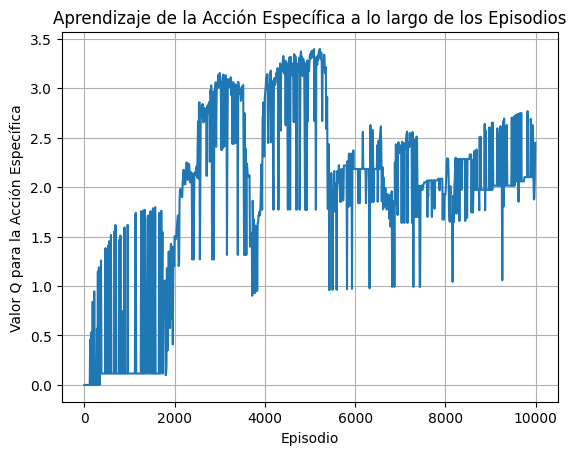



 |  | 
---------
 |  | 
---------
 |  | 

Tu turno (X)


 | X | 
---------
 |  | 
---------
 |  | 

Turno de la IA (O)


 | X | 
---------
 |  | 
---------
O |  | 

Tu turno (X)


 | X | X
---------
 |  | 
---------
O |  | 

Turno de la IA (O)


O | X | X
---------
 |  | 
---------
O |  | 

Tu turno (X)


O | X | X
---------
X |  | 
---------
O |  | 

Turno de la IA (O)


O | X | X
---------
X | O | 
---------
O |  | 

Tu turno (X)
Casilla ocupada, elige otra.


O | X | X
---------
X | O | 
---------
O |  | 

Tu turno (X)


O | X | X
---------
X | O | X
---------
O |  | 

Turno de la IA (O)


O | X | X
---------
X | O | X
---------
O | O | 

Tu turno (X)
Casilla ocupada, elige otra.


O | X | X
---------
X | O | X
---------
O | O | 

Tu turno (X)
Casilla ocupada, elige otra.


O | X | X
---------
X | O | X
---------
O | O | 

Tu turno (X)
O | X | X
---------
X | O | X
---------
O | O | X
¡Ganaste!


In [6]:
import random
import matplotlib.pyplot as plt

# Inicializar el tablero
board = [""] * 9

# Parámetros de Q-learning
learning_rate = 0.1
discount_factor = 0.9
exploration_prob = 0.1  # Probabilidad de exploración

# Crear una tabla Q para el agente (en este caso, el jugador "X")
q_table = {}

# Función para codificar el estado del tablero a una cadena
def encode_state(board):
    return "".join(board)

# Función para que la IA haga un movimiento basado en Q-learning
def ai_move(board):
    state = encode_state(board)
    
    # Si el estado no está en la tabla Q, lo inicializamos
    if state not in q_table:
        q_table[state] = [0.0] * 9  # Inicializamos valores Q para el estado
    
    legal_moves = [i for i, cell in enumerate(board) if cell == ""]
    
    # Exploración vs. Explotación
    if random.uniform(0, 1) < exploration_prob:
        return random.choice(legal_moves)
    else:
        # Devolvemos la acción con el mayor valor Q
        return max(legal_moves, key=lambda move: q_table[state][move])

# Función para actualizar la tabla Q después de una jugada
def update_q_table(state, action, reward, next_state):
    if state not in q_table:
        q_table[state] = [0.0] * 9
    if next_state not in q_table:
        q_table[next_state] = [0.0] * 9

    q_table[state][action] = q_table[state][action] + learning_rate * (reward + discount_factor * max(q_table[next_state]) - q_table[state][action])

# Función para verificar si un jugador ha ganado
def check_winner(board, player):
    winning_lines = [[0, 1, 2], [3, 4, 5], [6, 7, 8], [0, 3, 6], [1, 4, 7], [2, 5, 8], [0, 4, 8], [2, 4, 6]]
    for line in winning_lines:
        if all(board[i] == player for i in line):
            return True
    return False

# Ciclo de entrenamiento
episodes = []
q_values = []
for episode in range(10000):  # Entrenamiento para 10,000 partidas
    board = [""] * 9
    state = encode_state(board)
    
    while True:
        # Turno de la IA (X)
        action = ai_move(board)
        if board[action] == "":
            board[action] = "X"
        next_state = encode_state(board)
        
        if check_winner(board, "X"):
            reward = 1  # La IA gana
        elif check_winner(board, "O"):
            reward = -1  # La IA pierde
        elif "" not in board:
            reward = 0  # Empate
        else:
            reward = 0  # Juego sigue

        update_q_table(state, action, reward, next_state)

        if check_winner(board, "X") or check_winner(board, "O") or "" not in board:
            break
        
        state = next_state

    # Almacenar los valores Q para una acción específica
    if episode % 10 == 0:
        action_to_track = 0  # Cambiar a la acción que deseas rastrear
        episodes.append(episode)
        q_values.append(q_table[state][action_to_track])

# Graficar los valores Q en función de los episodios
plt.plot(episodes, q_values)
plt.title('Aprendizaje de la Acción Específica a lo largo de los Episodios')
plt.xlabel('Episodio')
plt.ylabel('Valor Q para la Acción Específica')
plt.grid()
plt.show()

# Juego contra el jugador humano
board = [""] * 9
player_turn = True

while True:
    # Imprimir el tablero de forma más visual
    print("\n")
    for i in range(0, 9, 3):
        print(" | ".join(board[i:i+3]))  # Mostrar tablero en formato 3x3
        if i < 6:
            print("---------")  # Separador entre filas del tablero

    # Turno del jugador humano
    if player_turn:
        print("\nTu turno (X)")
        move = int(input("Elige una casilla (0-8): "))
        if board[move] == "":
            board[move] = "X"
            player_turn = False
        else:
            print("Casilla ocupada, elige otra.")
    else:
        # Turno de la IA (O)
        print("\nTurno de la IA (O)")
        action = ai_move(board)
        board[action] = "O"
        player_turn = True

    # Verificar el estado del juego
    if check_winner(board, "X"):
        for i in range(0, 9, 3):
            print(" | ".join(board[i:i+3]))
            if i < 6:
                print("---------")
        print("¡Ganaste!")
        break
    elif check_winner(board, "O"):
        for i in range(0, 9, 3):
            print(" | ".join(board[i:i+3]))
            if i < 6:
                print("---------")
        print("¡La IA ganó!")
        break
    elif "" not in board:
        for i in range(0, 9, 3):
            print(" | ".join(board[i:i+3]))
            if i < 6:
                print("---------")
        print("Empate")
        break


In [ ]:
#Red Neuronal
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Inicializar el tablero
board = [""] * 9

# Función para codificar el estado del tablero a una cadena
def encode_state(board):
    return "".join(board)

# Función para crear una red neuronal simple
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(9,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(9, activation='linear')  # 9 salidas para cada casilla
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Función para que la IA haga un movimiento basado en la red neuronal
def ai_move(board, model):
    state = np.array([1 if cell == "X" else -1 if cell == "O" else 0 for cell in board])
    q_values = model.predict(np.array([state]))[0]
    legal_moves = [i for i, cell in enumerate(board) if cell == ""]
    q_values_available = [q_values[i] for i in legal_moves]
    return legal_moves[np.argmax(q_values_available)]

# Función para verificar si un jugador ha ganado
def check_winner(board, player):
    for line in [[0, 1, 2], [3, 4, 5], [6, 7, 8], [0, 3, 6], [1, 4, 7], [2, 5, 8], [0, 4, 8], [2, 4, 6]]:
        if all(board[i] == player for i in line):
            return True
    return False

# Ciclo principal del juego
model = create_model()
errors = []  # Lista para almacenar los errores en cada iteración
for _ in range(1000):
    board = [""] * 9
    state = np.array([1 if cell == "X" else -1 if cell == "O" else 0 for cell in board])
    while True:
        if "X" not in board and "O" not in board:
            action = random.randint(0, 8)
        else:
            action = ai_move(board, model)
        if board[action] == "":
            board[action] = "X"
        next_state = np.array([1 if cell == "X" else -1 if cell == "O" else 0 for cell in board])
        if check_winner(board, "X"):
            reward = 1
        elif check_winner(board, "O"):
            reward = -1
        elif "" not in board:
            reward = 0
        else:
            reward = 0  # Juego en curso
        target = model.predict(np.array([state]))[0]
        target[action] = reward
        error = model.fit(np.array([state]), np.array([target]), epochs=1, verbose=0).history['loss'][0]
        errors.append(error)
        if check_winner(board, "X"):
            break
        state = next_state

# Generar la gráfica de evolución del error
plt.plot(errors)
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.title('Evolución del error en el aprendizaje')
plt.show()

# Ahora, puedes utilizar la red neuronal entrenada para jugar contra la IA
board = [""] * 9
player_turn = True
while True:
    if player_turn:
        print("Tu turno (X)")
        move = int(input("Elige una casilla (0-8): "))
        if board[move] == "":
            board[move] = "X"
            player_turn = False
    else:
        print("Turno de la IA (O)")
        action = ai_move(board, model)
        board[action] = "O"
        player_turn = True
    # Mostrar el tablero
    for i in range(0, 9, 3):
        print(" ".join(board[i:i+3]))

    if check_winner(board, "X"):
        print("¡Ganaste!")
        break
    elif check_winner(board, "O"):
        print("¡La IA ganó!")
        break
    elif "" not in board:
        print("Empate")
        break

ModuleNotFoundError: No module named 'tensorflow'